## Gini coefficient

$ c = \frac{\sum_i^n \sum_j^n |x_i -x_j| } {2n^2 * \bar{x} }$

In [34]:
import glob
import os
from utils import load_net
import matplotlib.pyplot as plt
import numpy as np


def extract_sizes(path):
    sizes = []
    for f in glob.glob(path):
        fname = os.path.basename(f)
        toex = fname.split('-')[0]
        if '.' in toex:
            sizes.append(float(toex))
        else:
            sizes.append(int(toex))
    return sorted(sizes)

def read_randoms(di,runs=4):
    rres = dict()
    gms = extract_sizes(f"../res/newclusterres/{di}/4/*-evalresults.pickle")
    print('Got sizes: ',gms)
    
    for seed in range(1,runs+1):
        nets = list()
        for size in gms:
            #merged-1007-0-tc-nets-voting.pickle
            net_name = f"../res/newclusterres/{di}/{seed}/merged-{size}-0-tc-nets-voting.pickle"
            
            _, net = load_net(net_name)
            nets.append(net)
        rres[seed] = nets

    return rres

In [133]:
r = read_randoms(di='break10', runs=10)

Got sizes:  [43, 79, 104, 411, 640, 1007]


In [134]:
r4 = read_randoms(di='break04', runs=4)

Got sizes:  [0.65, 0.75, 0.85, 0.95]


In [135]:
for k,v in r4.items():
    print(k, list(map(len, v))) 
print('---')
for k,v in r.items():
    print(k, list(map(len, v)))

1 [996, 677, 409, 155]
2 [1011, 672, 415, 160]
3 [1024, 720, 416, 161]
4 [997, 686, 406, 157]
---
1 [43, 79, 104, 410, 640, 1007]
2 [43, 79, 104, 411, 640, 1006]
3 [43, 79, 104, 410, 639, 1006]
4 [43, 79, 104, 411, 640, 1006]
5 [43, 79, 104, 411, 640, 1006]
6 [43, 79, 104, 411, 640, 1007]
7 [43, 79, 104, 411, 639, 1005]
8 [43, 79, 104, 411, 640, 1006]
9 [43, 79, 104, 411, 640, 1007]
10 [43, 79, 104, 411, 640, 1007]


In [79]:
def gini(net):
    votes = list(map(sum, net.values()))
    dsum = 0
    for a in votes:
        for b in votes:
            dsum += abs(a-b)
    return dsum/(2*len(votes)**2*np.mean(votes))

In [95]:
get_vo = lambda x: sorted(list(map(sum, x.values())))

def plot_with_gini(net, ran):    
    plt.figure(figsize=(10,8))
    plt.title(f"Votes distribution streamed net % vs. streamed random (apk_net ={sum(get_vo(net))} apk_ran={sum(get_vo(ran))})")

    plt.plot(get_vo(net), label=f"net anchors={len(net)} gini={gini(net)}")
    plt.plot(get_vo(ran), label=f"rand anchors={len(ran)} gini={gini(ran)}")
    plt.xlabel('Anchor')
    plt.ylabel('Number of votes')
    plt.legend();

## Streamed net 40% with $\epsilon$=0.85

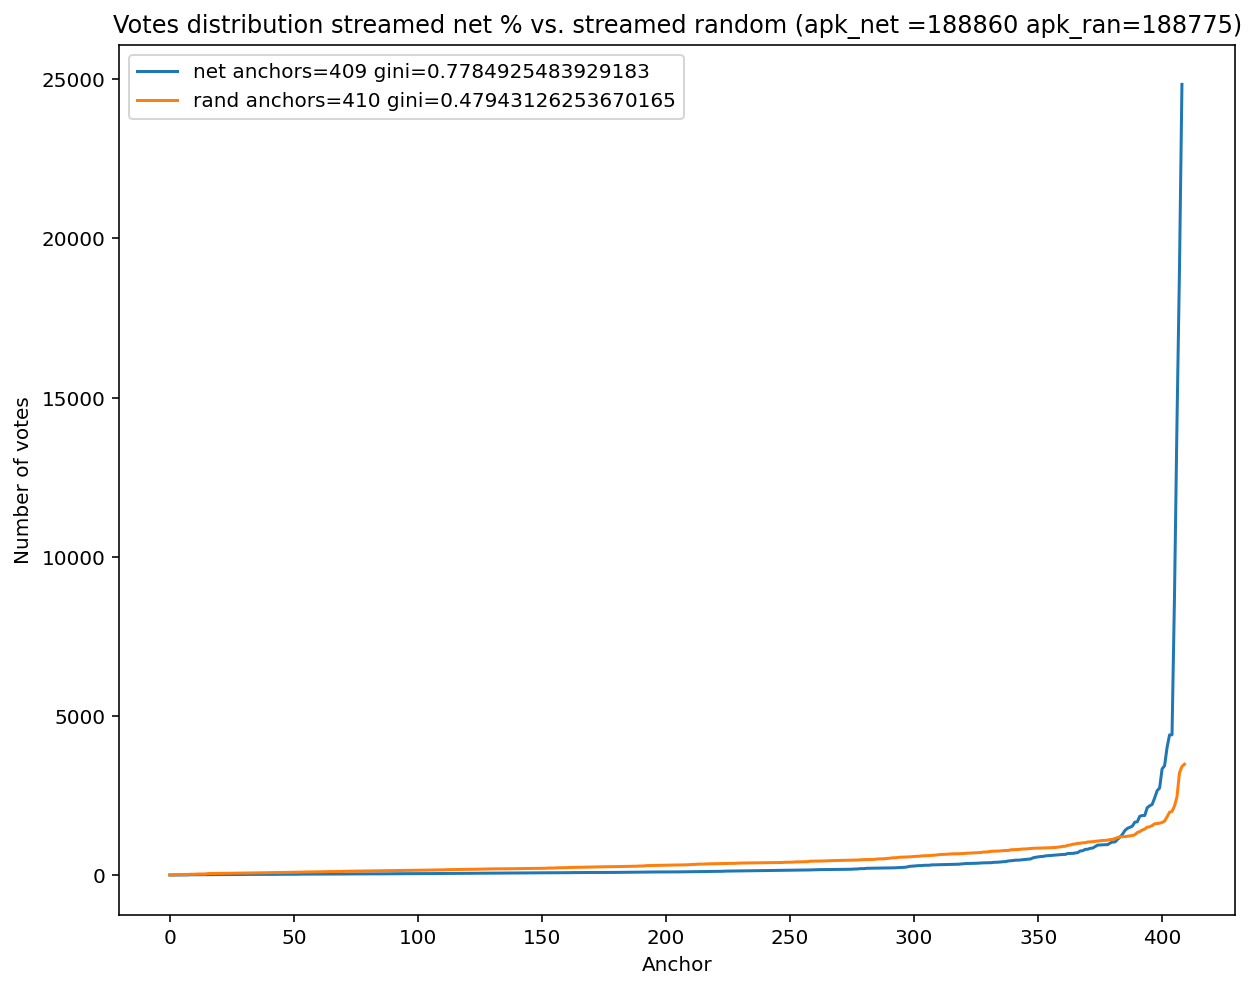

In [136]:
#[0.65, 0.75, 0.85, 0.95]
plot_with_gini(net=r4[1][2], ran=r[1][3])

## Streamed net 40% with $\epsilon$=0.65

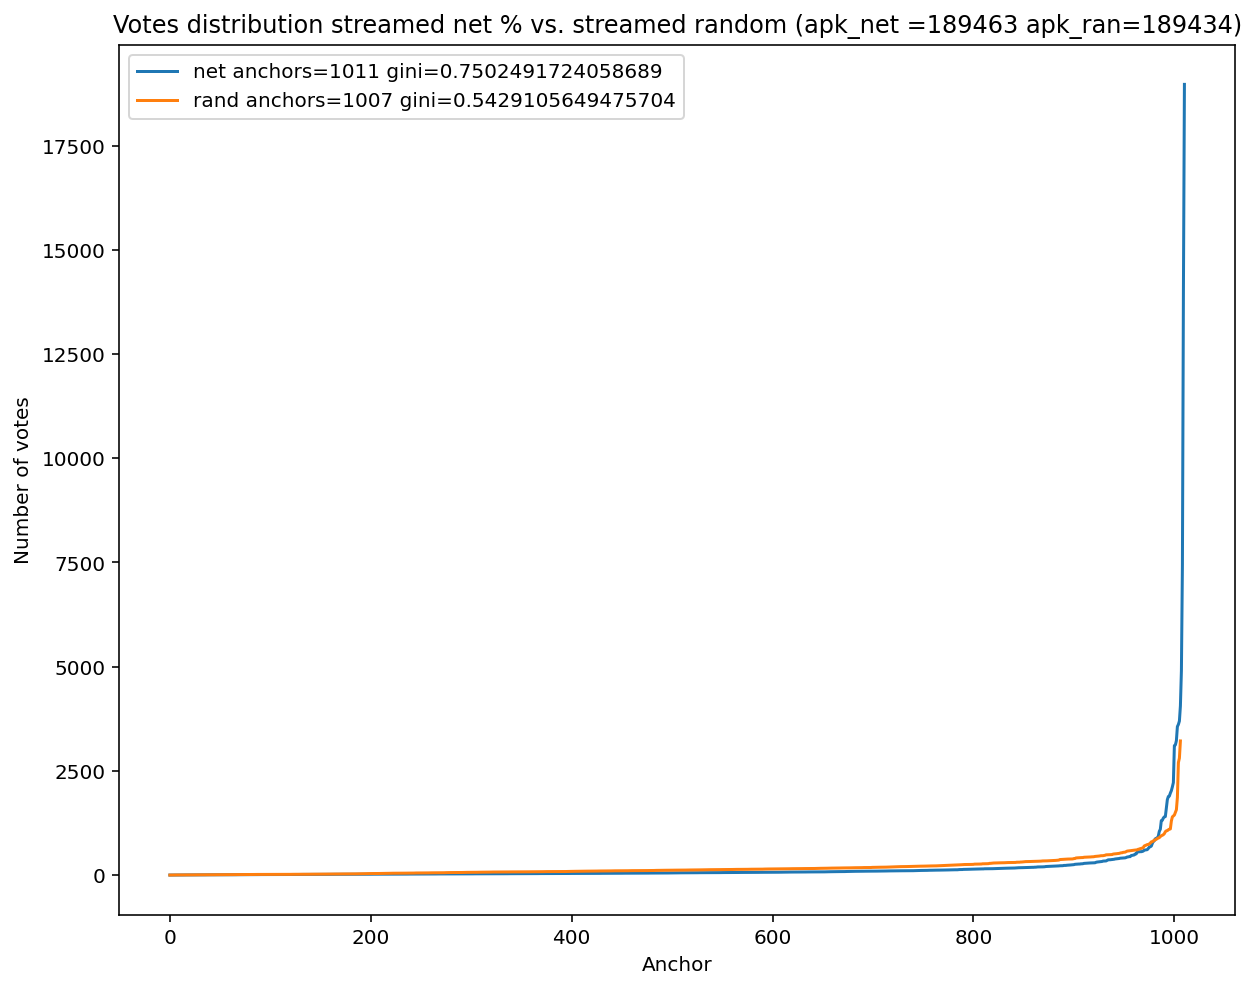

In [137]:
plot_with_gini(net=r4[2][0],ran=r[1][5])

In [110]:
gamma, max_n8 = load_net('../res/newclusterres/2ndrun/streamed-0.3-8/merged-0.3-0-tc-nets-voting.pickle')
gamma, max_n2 = load_net('../res/newclusterres/2ndrun/streamed-0.3-2/merged-0.3-0-tc-nets-voting.pickle')

## Comparision of two streamed networks with $epsilon$ = 0.3 and initial part 80% (blue) and 20% (red)

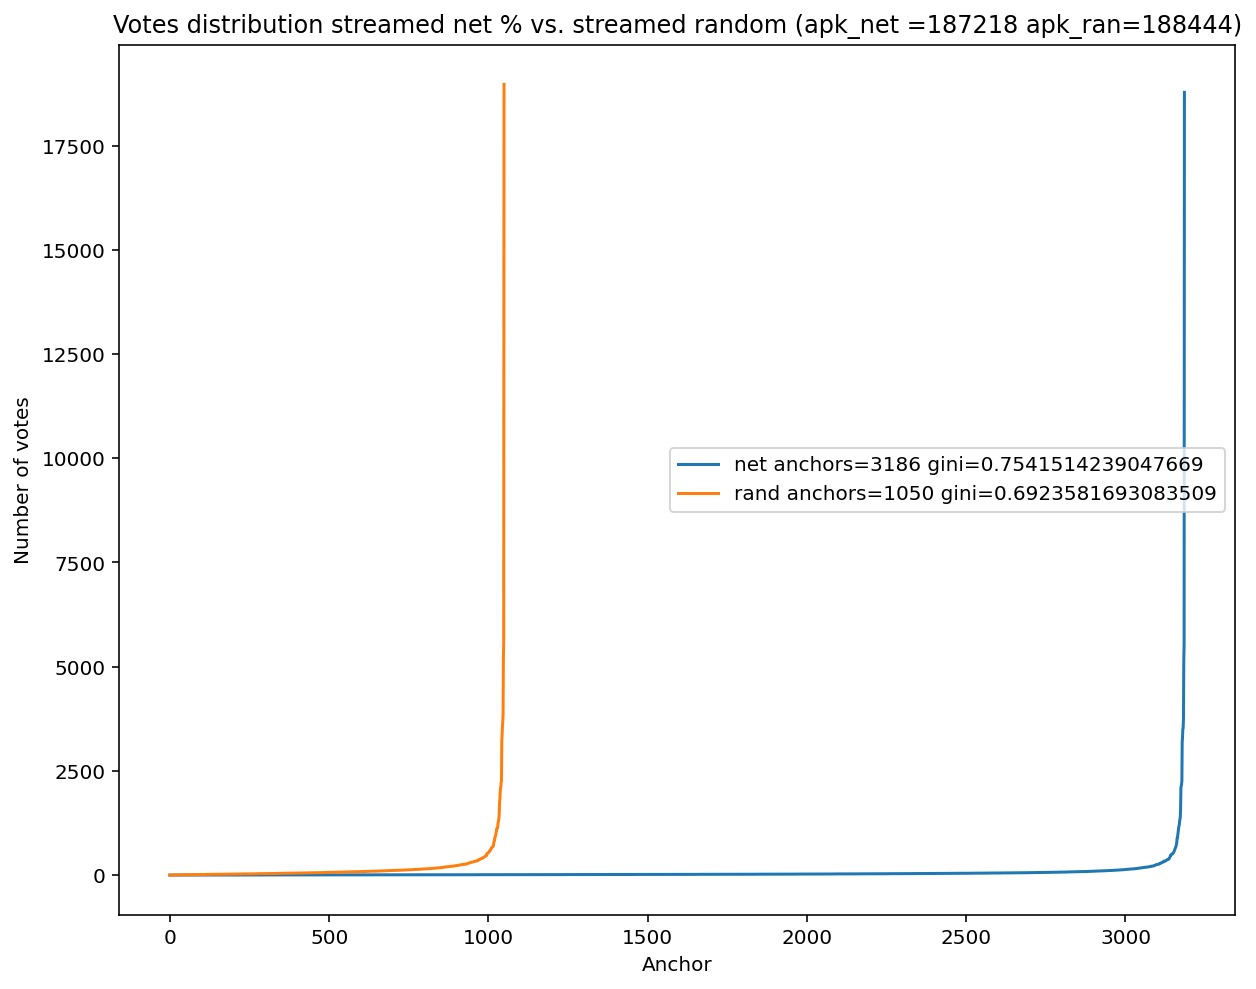

In [111]:
plot_with_gini(net=max_n8, ran=max_n2)

In [138]:
votes = list(map(sum, max_n8.values()))
v2 = list(map(sum, max_n2.values()))
vs4 = list(map(sum, r4[2][0].values()))
vs5 = list(map(sum, r[1][5].values()))

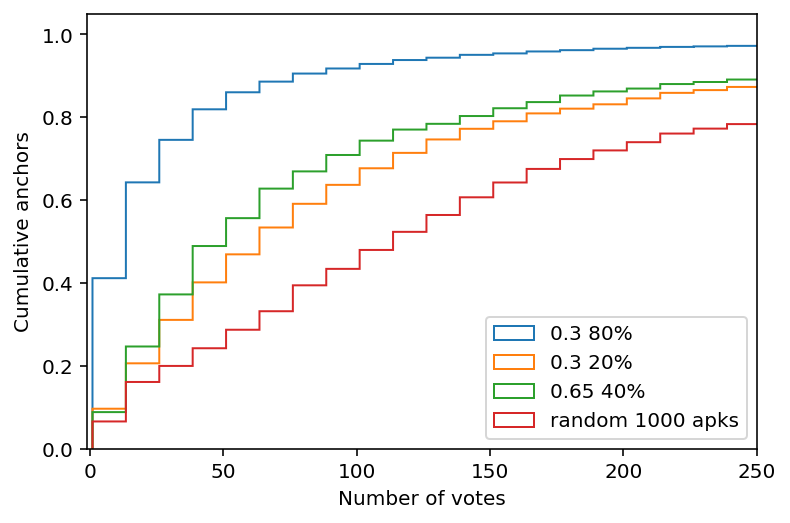

In [155]:
n, bins, patches=plt.hist(votes,bins=1500,density=True, histtype='step', cumulative=True, label='0.3 80%')
n, bins, pathces = plt.hist(v2, bins=bins, density=True, histtype='step', cumulative=True, label='0.3 20%')
n, bins, pathces = plt.hist(vs4, bins=bins, density=True, histtype='step', cumulative=True, label='0.65 40%')
n, bins, pathces = plt.hist(vs5, bins=bins, density=True, histtype='step', cumulative=True, label='random 1000 apks')

plt.xlim(-1,250)

plt.xlabel('Number of votes')
plt.ylabel('Cumulative anchors');
plt.legend(loc=4);